# Adbot Click Prediction Project

#### Problem Statement
In a digital ecosystem saturated with advertisements, accurately predicting the success of ad campaigns is pivotal for businesses. Adbot, a platform supporting small African businesses, aims to empower its clients with actionable insights to refine their ad campaigns and bolster customer engagement. The primary challenge is to accurately forecast the number of clicks an ad will receive one and two weeks into the future. This prediction will enable businesses to optimize their marketing strategies, allocate resources efficiently, and maximize their return on investment (ROI).

#### Objectives
1. **Data Exploration and Understanding**:
   - Analyze the provided datasets to understand the structure, distribution, and relationships between variables.
   - Identify and handle any missing or inconsistent data.
2. **Feature Engineering**:
   - Develop and transform features that could significantly impact the prediction of ad clicks.
   - Implement necessary data preprocessing steps.
3. **Model Development and Selection**:
   - Train and evaluate various regression models to predict the number of clicks.
   - Optimize model performance using techniques such as hyperparameter tuning.
4. **Model Interpretation**:
   - Identify and explain the most influential features impacting the number of clicks using interpretability techniques.
   - Provide insights into how different variables affect ad engagement.
5. **Prediction and Submission**:
   - Generate predictions for the test dataset, forecasting clicks one and two weeks into the future.
   - Prepare a submission file in the required format, including a description of the top predictors.

#### Stakeholders
1. **Small Business Owners**:
   - Primary users of the Adbot platform who will benefit from accurate click predictions to enhance their advertising strategies.
2. **Adbot**:
   - The company providing the platform, aiming to improve its service offering by integrating advanced predictive analytics.
3. **Data Scientists and Analysts**:
   - Individuals working on the project, responsible for developing and validating the predictive models.
4. **Marketing Teams**:
   - Professionals who will leverage the insights generated to create more effective ad campaigns.
5. **Investors and Management**:
   - Stakeholders interested in the platform’s success and its impact on client satisfaction and business growth.

### Step 1: Loading the Data

In [1]:
import pandas as pd

# Load the data
train_df = pd.read_csv('Train.csv')

# Display the first few rows of the dataframe
print(train_df.head())

   impressions  clicks    cost  conversions           ad_type currency  \
0        142.0    15.0  3393.0          0.0  EXPANDED_TEXT_AD      ZAR   
1         89.0     8.0  1817.0          0.0  EXPANDED_TEXT_AD      ZAR   
2         59.0     8.0  1743.0          0.0  EXPANDED_TEXT_AD      ZAR   
3         78.0     4.0   917.0          0.0  EXPANDED_TEXT_AD      ZAR   
4         20.0     1.0   217.0          0.0  EXPANDED_TEXT_AD      ZAR   

                            ID        date call_type call_status start_time  \
0  ID_5da86e71bf5dee4cf5047046  2020-01-01       NaN         NaN        NaN   
1  ID_5da86e71bf5dee4cf5047046  2020-01-01       NaN         NaN        NaN   
2  ID_5da86e71bf5dee4cf5047046  2020-01-01       NaN         NaN        NaN   
3  ID_5da86e71bf5dee4cf5047046  2020-01-01       NaN         NaN        NaN   
4  ID_5da86e71bf5dee4cf5047046  2020-01-01       NaN         NaN        NaN   

   duration end_time display_location  impression_share  conversions_calls  \
0 

In [2]:
import pandas as pd

# Load the training data
train_df = pd.read_csv('Train.csv')

# Load the sample submission data
sample_submission_df = pd.read_csv('SampleSubmission.csv')

# Display the first few rows of the training data
print(train_df.head())

# Display the first few rows of the sample submission data
print(sample_submission_df.head())

   impressions  clicks    cost  conversions           ad_type currency  \
0        142.0    15.0  3393.0          0.0  EXPANDED_TEXT_AD      ZAR   
1         89.0     8.0  1817.0          0.0  EXPANDED_TEXT_AD      ZAR   
2         59.0     8.0  1743.0          0.0  EXPANDED_TEXT_AD      ZAR   
3         78.0     4.0   917.0          0.0  EXPANDED_TEXT_AD      ZAR   
4         20.0     1.0   217.0          0.0  EXPANDED_TEXT_AD      ZAR   

                            ID        date call_type call_status start_time  \
0  ID_5da86e71bf5dee4cf5047046  2020-01-01       NaN         NaN        NaN   
1  ID_5da86e71bf5dee4cf5047046  2020-01-01       NaN         NaN        NaN   
2  ID_5da86e71bf5dee4cf5047046  2020-01-01       NaN         NaN        NaN   
3  ID_5da86e71bf5dee4cf5047046  2020-01-01       NaN         NaN        NaN   
4  ID_5da86e71bf5dee4cf5047046  2020-01-01       NaN         NaN        NaN   

   duration end_time display_location  impression_share  conversions_calls  \
0 

### Data Exploration and Preprocessing


         impressions         clicks           cost    conversions  \
count  289526.000000  289526.000000  289526.000000  289526.000000   
mean       72.809620       8.039927    2208.525051       0.790140   
std       153.592792      36.241161    7392.609733      10.298258   
min         0.000000       0.000000       0.000000       0.000000   
25%         6.000000       0.000000       0.000000       0.000000   
50%        23.000000       2.000000     553.000000       0.000000   
75%        69.000000       6.000000    2062.500000       0.000000   
max      6833.000000    4227.000000  719928.000000    1297.000000   

           duration  impression_share  conversions_calls  headline1_len  \
count  36900.000000     289926.000000      280071.000000  289526.000000   
mean      67.968970         16.656556           0.127928       2.745584   
std       98.055148         12.186418           0.526362       1.571108   
min        0.000000          0.000000           0.000000       0.000000   
25%

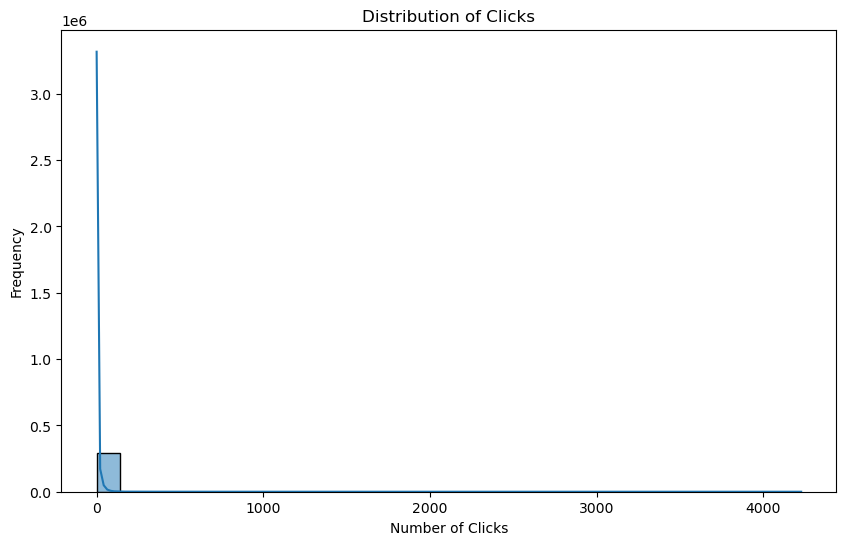

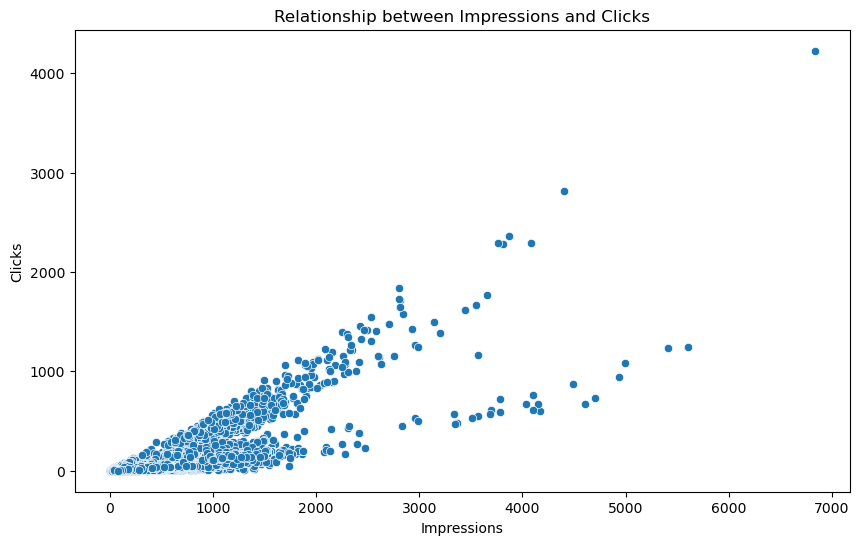

In [3]:
# Basic statistics
print(train_df.describe())

# Check missing values
print(train_df.isnull().sum())

# Visualize distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of clicks
plt.figure(figsize=(10, 6))
sns.histplot(train_df['clicks'], bins=30, kde=True)
plt.title('Distribution of Clicks')
plt.xlabel('Number of Clicks')
plt.ylabel('Frequency')
plt.show()

# Relationship between clicks and impressions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='impressions', y='clicks', data=train_df)
plt.title('Relationship between Impressions and Clicks')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.show()

The basic statistics provide some valuable insights into the data. Here are some key observations:

1. **Impressions and Clicks:**
   - On average, ads receive around 72 impressions and 8 clicks.
   - However, there is a wide range in the number of impressions and clicks, as indicated by the large standard deviations.
   - Some ads have received as many as 6833 impressions and 4227 clicks, while others have received none.

2. **Cost and Conversions:**
   - The average cost incurred for an ad is around 2208 currency units, with a wide range and high standard deviation.
   - Similarly, the average number of conversions resulting from ads is around 0.79, with a wide range and high standard deviation.

3. **Duration and Ad Description Length:**
   - The average duration of ad displays is approximately 68 units, with a maximum of 2125 units.
   - The average length of ad descriptions is around 11 units, with a maximum of 20 units.

4. **Missing Values:**
   - There are missing values in several columns, particularly in `call_type`, `call_status`, `start_time`, `duration`, `end_time`, and `display_location`.
   - We'll need to handle these missing values appropriately during preprocessing.

Now, let's visualize some of these distributions and relationships to gain further insights.

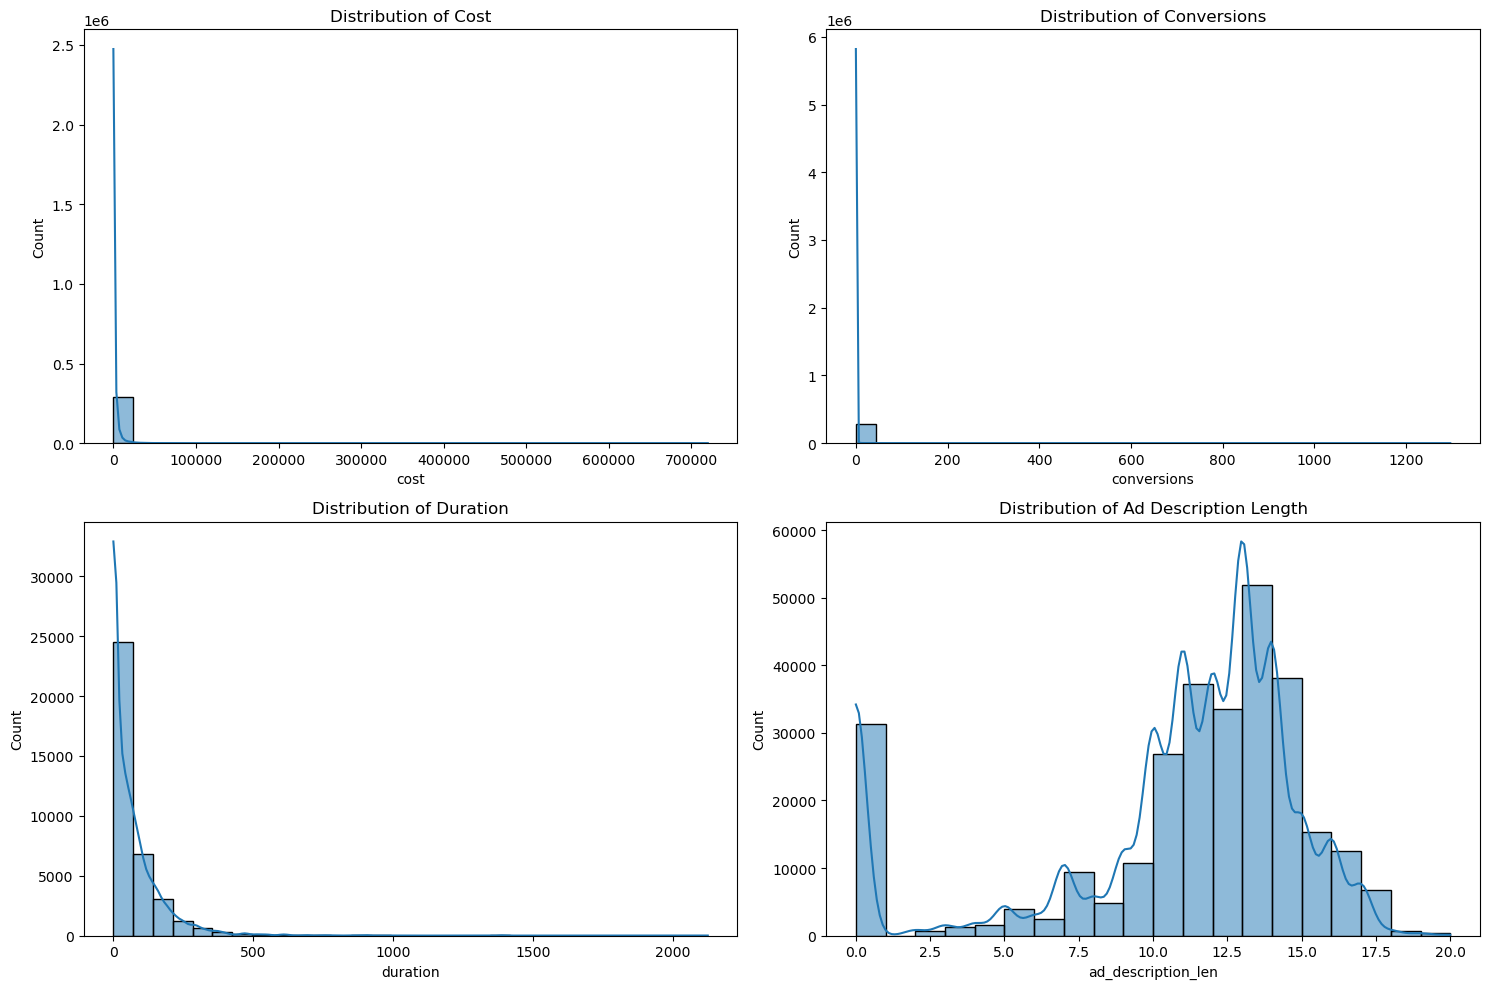

In [4]:
# Visualize distributions of cost, conversions, duration, and ad description length
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(train_df['cost'], bins=30, kde=True)
plt.title('Distribution of Cost')

plt.subplot(2, 2, 2)
sns.histplot(train_df['conversions'], bins=30, kde=True)
plt.title('Distribution of Conversions')

plt.subplot(2, 2, 3)
sns.histplot(train_df['duration'], bins=30, kde=True)
plt.title('Distribution of Duration')

plt.subplot(2, 2, 4)
sns.histplot(train_df['ad_description_len'], bins=20, kde=True)
plt.title('Distribution of Ad Description Length')

plt.tight_layout()
plt.show()


* The distribution of cost appears to be right skewed, with most ads costing less and a tail of more expensive ads. 
*  The distribution of duration appears to be bimodal, with a peak around 500 and another around 1500. 
* The distribution of ad description length appears to be right skewed, with most ads having short descriptions and a tail of longer descriptions. 
* There does not appear to be a clear pattern in the distribution of conversions. 

possible interpretations are:

* Cost: Ads that are more expensive may be longer or more elaborate, and therefore more likely to get clicks. However, they may also be more expensive because they are targeted to a smaller audience.
* Duration: There may be an optimal ad length for clicks. Ads that are too short may not be informative enough, and ads that are too long may lose viewers' attention.
* Ad description length: Similar to ad duration, there may be an optimal ad description length. Short descriptions may not be informative enough, and long descriptions may be overwhelming.
* Conversions: The distribution of conversions is difficult to interpret without knowing more about the data. However, it is possible that there is no relationship between the variables that were measured and conversions.

The next step in the data preprocessing phase involves handling missing values. Since several columns in the dataset have missing values, we need to decide how to handle them. Here's a systematic approach:

1. **Identify Columns with Missing Values**: Review the columns with missing values and understand their importance in the dataset.

2. **Handle Missing Values**:
   - For numerical columns, options include imputation (using mean, median, or mode) or removal of rows with missing values.
   - For categorical columns, options include imputation (using the most frequent category) or treating missing values as a separate category.

3. **Verify Data Integrity**: After handling missing values, ensure that the dataset retains its integrity and that no important information is lost.

Let's bigin with handling missing values in the dataset. We'll start by identifying the columns with missing values and then decide on the appropriate handling strategy for each column.

**Step 1: Identify Columns with Missing Values**

In [5]:
import pandas as pd

# Step 1: Load the dataset
file_path = "Train.csv"
train_data = pd.read_csv(file_path)

# Step 2: Handle Missing Values

# Identify columns with missing values
columns_with_missing = train_data.columns[train_data.isnull().any()]
print("Columns with missing values:\n", columns_with_missing)

Columns with missing values:
 Index(['impressions', 'clicks', 'cost', 'conversions', 'ad_type', 'currency',
       'call_type', 'call_status', 'start_time', 'duration', 'end_time',
       'display_location', 'conversions_calls', 'headline1_len',
       'headline2_len', 'ad_description_len'],
      dtype='object')


**Step 2: Handle Missing Values**


In [6]:
# For numerical columns, fill missing values with median
numerical_columns = train_data.select_dtypes(include=['float64']).columns
train_data[numerical_columns] = train_data[numerical_columns].fillna(train_data[numerical_columns].median())

# For categorical columns, fill missing values with the most frequent category
categorical_columns = train_data.select_dtypes(include=['object']).columns
train_data[categorical_columns] = train_data[categorical_columns].fillna(train_data[categorical_columns].mode().iloc[0])

**Step 3: Verify Data Integrity**


In [7]:
# Verify if there are any missing values left
print("Missing values after handling:\n", train_data.isnull().sum())

Missing values after handling:
 impressions           0
clicks                0
cost                  0
conversions           0
ad_type               0
currency              0
ID                    0
date                  0
call_type             0
call_status           0
start_time            0
duration              0
end_time              0
display_location      0
impression_share      0
conversions_calls     0
headline1_len         0
headline2_len         0
ad_description_len    0
dtype: int64


The next steps typically involve exploring relationships between variables, visualizing distributions, and preparing the data for modeling. Here's what we can do next:

1. **Explore Relationships Between Variables**:
   - Examine correlations between numerical variables to identify patterns or dependencies.
   - Analyze how categorical variables relate to the target variable (`clicks`) through group-wise summaries or visualizations.

2. **Visualize Distributions**:
   - Create histograms or density plots to visualize the distribution of numerical variables.
   - Use bar plots or pie charts to visualize the distribution of categorical variables.

3. **Prepare Data for Modeling**:
   - Encode categorical variables if necessary (e.g., one-hot encoding).
   - Split the data into features (X) and the target variable (y).
   - Split the data into training and validation sets for model evaluation.

Let's start with exploring relationships between variables. We can analyze correlations between numerical variables and visualize the distribution of key variables

**exploring correlations between numerical variables:**

In [8]:
# Step 1: Explore Correlations

# Select only numerical columns for correlation calculation
numerical_columns = train_data.select_dtypes(include=['float64']).columns

# Calculate correlation matrix
correlation_matrix = train_data[numerical_columns].corr()

# Print correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                     impressions    clicks      cost  conversions  duration  \
impressions            1.000000  0.734694  0.472110     0.297272  0.017523   
clicks                 0.734694  1.000000  0.278909     0.128791  0.007137   
cost                   0.472110  0.278909  1.000000     0.176606  0.066429   
conversions            0.297272  0.128791  0.176606     1.000000 -0.026255   
duration               0.017523  0.007137  0.066429    -0.026255  1.000000   
impression_share       0.008130  0.126397  0.079052    -0.052676  0.054720   
conversions_calls      0.107690  0.039017  0.073094     0.072489  0.448234   
headline1_len          0.093608  0.075644  0.085295     0.006576 -0.009595   
headline2_len          0.259552  0.144890  0.132680     0.063418 -0.013185   
ad_description_len     0.160188  0.077108  0.070661     0.033470 -0.004154   

                    impression_share  conversions_calls  headline1_len  \
impressions                 0.008130          

**Visualize the distribution of each numerical variable using histograms or density plots.**

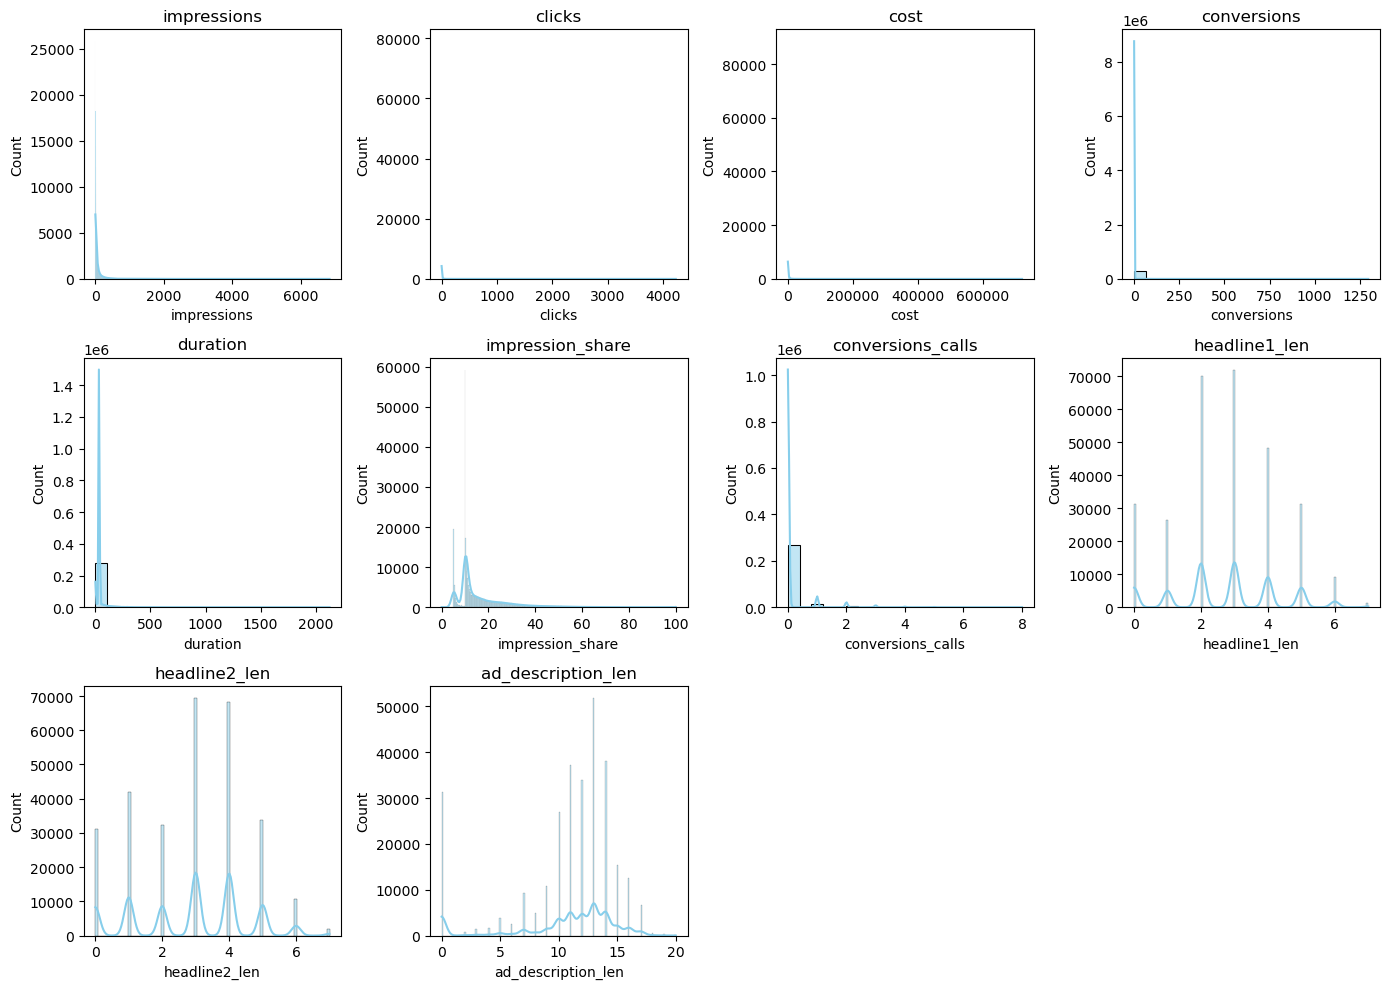

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Loop through each numerical variable and create a histogram
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 4, i + 1)  # Adjusted layout to accommodate all numerical variables
    sns.histplot(train_data[col], kde=True, color='skyblue')
    plt.title(col)

# Adjust layout
plt.tight_layout()
plt.show()

The  variables include impressions, clicks, cost, conversions, duration, impression share, headline length (headline 1 and headline 2) and ad description length. 

* **Impressions:** The number of times the ad was shown. The distribution appears right skewed, with most ads having a lower number of impressions and a tail of ads with a higher number of impressions. 
* **Clicks:** The number of times someone viewed the ad and clicked on a hyperlink within the ad. The distribution appears right skewed, with most ads having a lower number of clicks and a tail of ads with a higher number of clicks. 
* **Cost:** The amount of money spent on the ad campaign. The distribution appears right skewed, with most campaigns costing less and a tail of more expensive campaigns. 
* **Conversions:** The number of times a click resulted in a desired outcome, such as a sale or a sign-up. The distribution is difficult to discern from this image. 
* **Duration:** The length of time the ad campaign ran. The distribution appears bimodal, with a peak around 500 and another around 1500. 
* **Impression Share:** The percentage of times your ad was eligible to be shown that it actually showed. The distribution appears right skewed, with most campaigns having a lower impression share and a tail of campaigns with a higher impression share. 
* **Headline Length (Headline 1 and Headline 2):** The number of characters in the headline. The distribution appears right skewed, with most headlines being shorter and a tail of longer headlines.
* **Ad Description Length:** The number of characters in the ad description. The distribution appears right skewed, with most ads having short descriptions and a tail of longer descriptions.

It is important to note that without knowing more about the data, it is difficult to say for sure what these distributions mean for predicting ad clicks. However, some possible interpretations are:

* **Cost:** Ads that are more expensive may be shown more often (higher impressions) or may be targeted to a more relevant audience, and therefore more likely to get clicks and conversions. However, they may also be more expensive because they are targeted to a smaller audience.
* **Duration:** There may be an optimal ad campaign duration for clicks and conversions. Ads that are too short may not be seen enough, and ads that are too long may lose viewers' attention.
* **Impression Share:** A higher impression share may lead to more clicks and conversions, since more people are seeing the ad. 
* **Headline and Description Length:** Similar to ad duration, there may be an optimal headline and ad description length. Short headlines and descriptions may not be informative enough, and long ones may be overwhelming.
* **Conversions:** The distribution of conversions is difficult to interpret without knowing more about the data. However, it is possible that there is no relationship between the variables that were measured and conversions.


Now we continue with exploring the relationships between categorical variables and the target variable (`clicks`). We can do this by creating group-wise summaries or visualizations.

Here's the plan:

1. **Analyze Relationships**: Examine how categorical variables relate to the target variable (`clicks`) through group-wise summaries or visualizations.

Let's start by analyzing the relationships between categorical variables and the target variable (`clicks`). We can use bar plots or box plots to visualize these relationships.

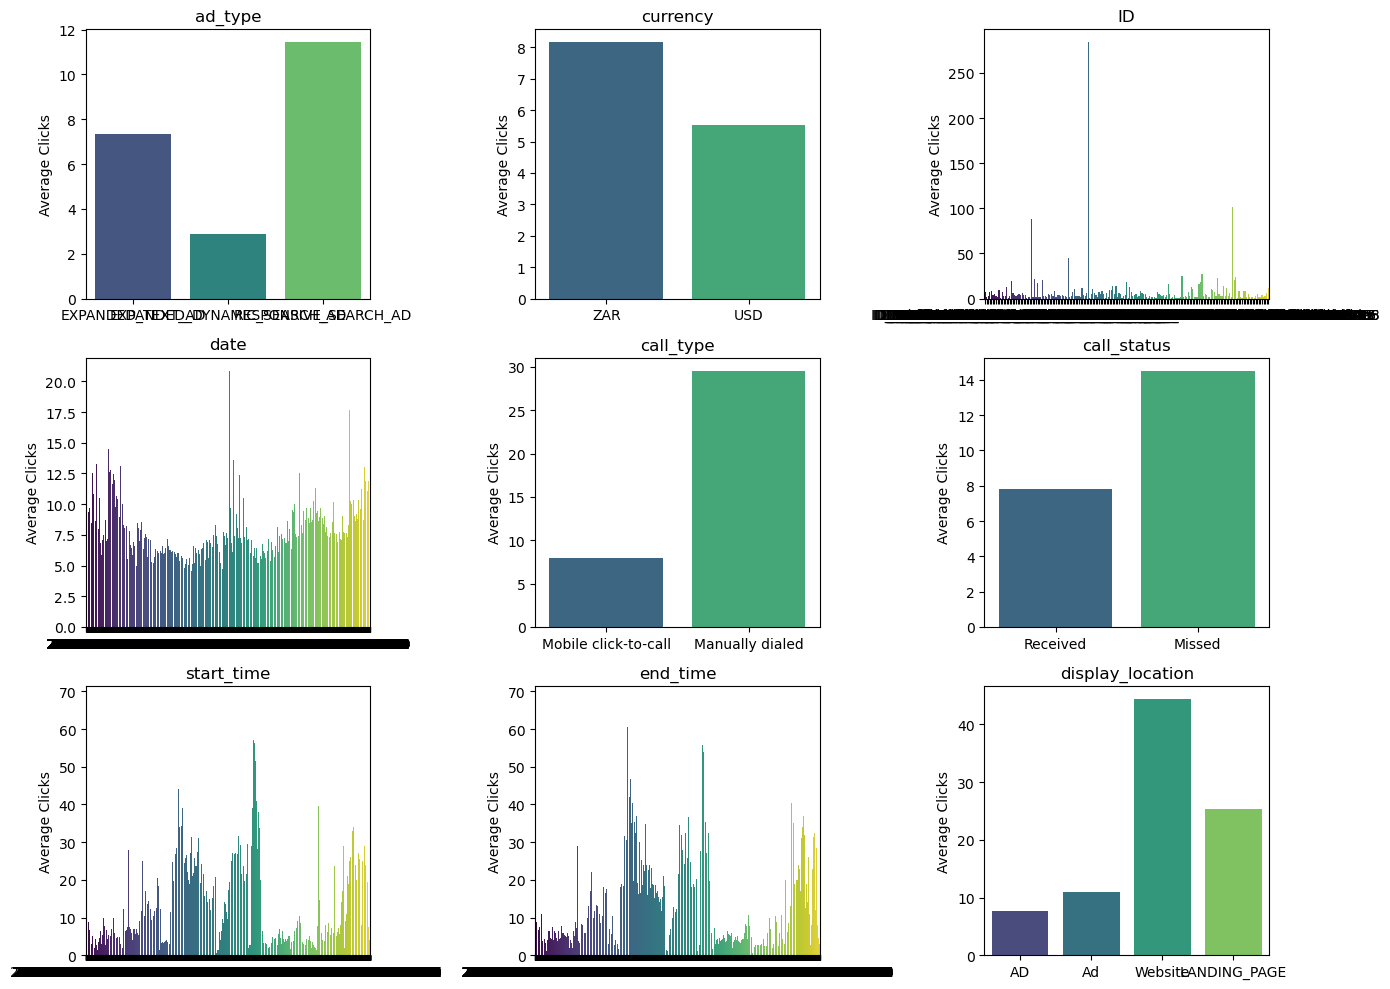

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np  # Import NumPy

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Loop through each categorical variable and create a bar plot
for i, col in enumerate(categorical_columns):
    plt.subplot(3, 3, i + 1)
    sns.barplot(x=col, y='clicks', data=train_data, estimator=np.mean, ci=None, palette='viridis')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Average Clicks')

# Adjust layout
plt.tight_layout()
plt.show()

we can move on to the next step: preparing the data for modeling.

Here's what we can do next:

1. **Prepare Data for Modeling**:
   - Encode categorical variables if necessary (e.g., one-hot encoding).
   - Split the data into features (X) and the target variable (y).
   - Split the data into training and validation sets for model evaluation.

**Let's start with encoding categorical variables using one-hot encoding:**


In [11]:
# Check the number of unique values in each categorical column
unique_counts = train_data[categorical_columns].nunique()
print(unique_counts)

ad_type                3
currency               2
ID                   185
date                1505
call_type              2
call_status            2
start_time          7488
end_time            7490
display_location       4
dtype: int64


In [12]:
# Drop columns with many unique categories and that are not essential
train_data_reduced = train_data.drop(['ID', 'date', 'call_type', 'call_status', 'start_time', 'end_time'], axis=1)

# Update the list of categorical columns
categorical_columns = train_data_reduced.select_dtypes(include=['object']).columns.tolist()

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack, csr_matrix

# Define the features and target
X = train_data_reduced.drop('clicks', axis=1)
y = train_data_reduced['clicks']

# Identify categorical features and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

# One-hot encode categorical features
ohe = OneHotEncoder(sparse=True, drop='first')
X_categorical_sparse = ohe.fit_transform(X[categorical_features])

# Convert numerical features to sparse format
X_numerical_sparse = csr_matrix(X[numerical_features].values)

# Combine sparse categorical and numerical features
X_sparse = hstack([X_numerical_sparse, X_categorical_sparse])

# Split the data into training and validation sets
X_train_sparse, X_val_sparse, y_train, y_val = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train_sparse.shape)
print("Validation data shape:", X_val_sparse.shape)
print("Training target shape:", y_train.shape)
print("Validation target shape:", y_val.shape)

Training data shape: (231940, 15)
Validation data shape: (57986, 15)
Training target shape: (231940,)
Validation target shape: (57986,)


## Modeling

### Baseline Model:
We'll start by building a simple linear regression model to establish a performance baseline.

### Advanced Models:
Next, we'll experiment with more sophisticated models, including:
- Decision Trees
- Random Forest
- Gradient Boosting Machines (e.g., XGBoost, LightGBM)
- Neural Networks (if applicable)

### Model Interpretation:
We'll ensure that the models are interpretable by using methods such as feature importance scores or SHAP values.

Let's begin by building the baseline model using linear regression. We'll then proceed with the advanced models.

## Baseline Model - Linear Regression
Let's start with a simple Linear Regression model:

#### Downsample the Data

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the model
linear_regression_model = LinearRegression()

# Train the model
linear_regression_model.fit(X_train_sparse, y_train)

# Predict on the validation set
y_val_pred = linear_regression_model.predict(X_val_sparse)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f'Validation RMSE: {rmse}')

Validation RMSE: 23.144325203289405


In [15]:
# Get feature names
feature_names = numerical_features + list(ohe.get_feature_names_out(categorical_features))

# Combine coefficients with feature names
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': linear_regression_model.coef_
})

# Sort by absolute value of coefficient
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print(feature_importance.head(10))

                         Feature  Coefficient  Absolute Coefficient
11                  currency_ZAR     4.946559              4.946559
5              conversions_calls    -4.456991              4.456991
9       ad_type_EXPANDED_TEXT_AD    -2.820858              2.820858
10  ad_type_RESPONSIVE_SEARCH_AD    -2.771211              2.771211
6                  headline1_len     1.788132              1.788132
12           display_location_Ad    -1.426754              1.426754
7                  headline2_len    -0.954820              0.954820
4               impression_share     0.380312              0.380312
8             ad_description_len    -0.343873              0.343873
2                    conversions    -0.299699              0.299699


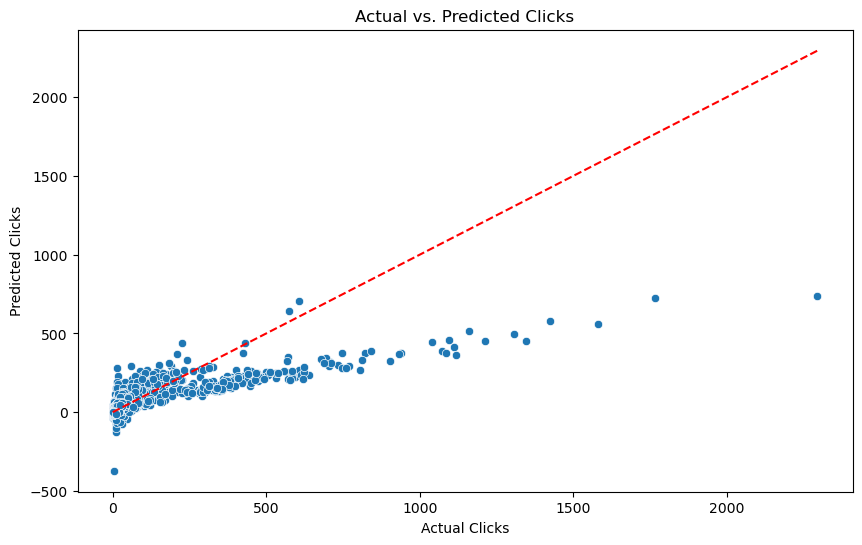

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_val_pred)
plt.xlabel('Actual Clicks')
plt.ylabel('Predicted Clicks')
plt.title('Actual vs. Predicted Clicks')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.show()

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the model
gbr_model = GradientBoostingRegressor(random_state=42)

# Define a smaller grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=gbr_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_sparse, y_train)

# Best model from grid search
best_gbr_model = grid_search.best_estimator_

# Predict on the validation set
y_val_pred_gbr = best_gbr_model.predict(X_val_sparse)

# Calculate RMSE
rmse_gbr = np.sqrt(mean_squared_error(y_val, y_val_pred_gbr))
print(f'Validation RMSE (Gradient Boosting): {rmse_gbr}')

# Feature importance
importances = best_gbr_model.feature_importances_
feature_importance_gbr = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_gbr.head(10))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Validation RMSE (Gradient Boosting): 6.123957400605086
                         Feature  Importance
0                    impressions    0.667879
4               impression_share    0.226232
6                  headline1_len    0.037618
7                  headline2_len    0.030137
1                           cost    0.016465
8             ad_description_len    0.012701
10  ad_type_RESPONSIVE_SEARCH_AD    0.004254
9       ad_type_EXPANDED_TEXT_AD    0.002881
11                  currency_ZAR    0.001429
2                    conversions    0.000242


## Model Evaluation Test

In [20]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Shape of the datasets
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)

Training data shape: (185552, 12)
Validation data shape: (46388, 12)
Test data shape: (57986, 12)


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Load the training data
train_data = pd.read_csv('Train.csv')

# Fill missing values
train_data = train_data.fillna({
    'impressions': train_data['impressions'].mean(),
    'clicks': train_data['clicks'].mean(),
    'cost': train_data['cost'].mean(),
    'conversions': train_data['conversions'].mean(),
    'headline1_len': train_data['headline1_len'].mean(),
    'headline2_len': train_data['headline2_len'].mean(),
    'ad_description_len': train_data['ad_description_len'].mean(),
    'conversions_calls': 0
})

# Drop unnecessary columns
train_data = train_data.drop(columns=['call_type', 'call_status', 'start_time', 'end_time', 'display_location'])

# One-hot encode categorical features
train_data = pd.get_dummies(train_data, columns=['ad_type', 'currency'], drop_first=True)

# Extract features and target
X = train_data.drop(columns=['clicks', 'ID', 'date'])
y = train_data['clicks']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SimpleImputer to handle any remaining missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)

# Train a HistGradientBoostingRegressor
hgbr_model = HistGradientBoostingRegressor(random_state=42)
hgbr_model.fit(X_train, y_train)

# Validate the model
y_val_pred = hgbr_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE (HistGradient Boosting): {val_rmse}")

# Load the sample submission data
submission_data = pd.read_csv('SampleSubmission.csv')

# Extract the ad_id and date from the sample submission IDs
submission_data['ad_id'] = submission_data['ID'].apply(lambda x: "_".join(x.split("_")[1:-3]))
submission_data['date'] = submission_data['ID'].apply(lambda x: "_".join(x.split("_")[-3:]))

# Merge with train_data to get the required features
merged_data = submission_data.merge(train_data, left_on='ad_id', right_on='ID', how='left')

# Drop unnecessary columns
merged_data = merged_data.drop(columns=['ID_y', 'date_y'])

# Rename columns to align with the model features
merged_data = merged_data.rename(columns={'ID_x': 'ID', 'date_x': 'date'})

# Fill missing values in merged_data
merged_data = merged_data.fillna({
    'impressions': merged_data['impressions'].mean(),
    'cost': merged_data['cost'].mean(),
    'conversions': merged_data['conversions'].mean(),
    'headline1_len': merged_data['headline1_len'].mean(),
    'headline2_len': merged_data['headline2_len'].mean(),
    'ad_description_len': merged_data['ad_description_len'].mean(),
    'conversions_calls': 0
})

# Ensure the merged_data has the same features as the training set
merged_data = merged_data.reindex(columns=X.columns, fill_value=0)

# Impute any remaining missing values in the test data
merged_data = imputer.transform(merged_data)

# Make predictions on the test set
test_predictions = hgbr_model.predict(merged_data)

# Prepare the submission file
submission = pd.DataFrame({
    'ID': submission_data['ID'],
    'clicks': test_predictions
})

# Save the submission file
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully!")

Validation RMSE (HistGradient Boosting): 9.444246625559384
Submission file created successfully!


### Feature Engineering !!

In [32]:
import pandas as pd
import numpy as np

# Load data
train_data = pd.read_csv('Train.csv')

# Handle missing values
train_data.fillna(method='ffill', inplace=True)
train_data.fillna(method='bfill', inplace=True)

# Feature Engineering
train_data['date'] = pd.to_datetime(train_data['date'], errors='coerce')
train_data['day'] = train_data['date'].dt.day
train_data['month'] = train_data['date'].dt.month
train_data['year'] = train_data['date'].dt.year
train_data['day_of_week'] = train_data['date'].dt.dayofweek
train_data['is_weekend'] = train_data['day_of_week'] >= 5

# Drop original date column
train_data.drop(['date', 'ID'], axis=1, inplace=True)

# One-hot encode categorical features
train_data = pd.get_dummies(train_data, columns=['ad_type', 'currency', 'call_type', 'call_status', 'display_location'])

# Ensure all columns are numeric
train_data = train_data.apply(pd.to_numeric, errors='coerce')
train_data.fillna(0, inplace=True)

# Split data
X = train_data.drop('clicks', axis=1)
y = train_data['clicks']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training with HistGradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Define model
hgb_model = HistGradientBoostingRegressor(random_state=42)

# Train the model
hgb_model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import mean_squared_error

y_pred = hgb_model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f'Validation RMSE (HistGradient Boosting): {rmse}')

Validation RMSE (HistGradient Boosting): 8.110485202677552


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load the training data
train_data = pd.read_csv('Train.csv')

# Handle missing values by filling forward then backward
train_data.fillna(method='ffill', inplace=True)
train_data.fillna(method='bfill', inplace=True)

# Feature Engineering
train_data['date'] = pd.to_datetime(train_data['date'].str.strip(), errors='coerce')
train_data['day'] = train_data['date'].dt.day
train_data['month'] = train_data['date'].dt.month
train_data['year'] = train_data['date'].dt.year
train_data['day_of_week'] = train_data['date'].dt.dayofweek
train_data['is_weekend'] = train_data['day_of_week'] >= 5

# Drop original date and ID columns
train_data.drop(['date', 'ID'], axis=1, inplace=True)

# One-hot encode categorical features
train_data = pd.get_dummies(train_data, columns=['ad_type', 'currency', 'call_type', 'call_status', 'display_location'])

# Split data into features and target variable
X = train_data.drop('clicks', axis=1)
y = train_data['clicks']

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the HistGradientBoostingRegressor
hgb_model = HistGradientBoostingRegressor(random_state=42)

# Train the model
hgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = hgb_model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f'Validation RMSE (HistGradient Boosting): {rmse}')

# Hyperparameter Tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_iter': [100, 200, 300]
}

random_search = RandomizedSearchCV(
    estimator=hgb_model,
    param_distributions=param_grid,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print(f'Best Parameters: {random_search.best_params_}')
print(f'Best Score: {random_search.best_score_}')

# Re-train the model with the best parameters
best_hgb_model = random_search.best_estimator_

# Cross-validation
cv_scores = cross_val_score(best_hgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-validation RMSE scores: {cv_rmse_scores}')
print(f'Mean Cross-validation RMSE: {cv_rmse_scores.mean()}')

# Load test data
test_data = pd.read_csv('SampleSubmission.csv')

# Extract ad IDs and dates
test_data['ID_split'] = test_data['ID'].str.split('_')
test_data['ad_ID'] = test_data['ID_split'].apply(lambda x: x[1])
test_data['date'] = test_data['ID_split'].apply(lambda x: '_'.join(x[2:]))

# Feature engineering on test data
test_data['date'] = pd.to_datetime(test_data['date'].str.strip(), errors='coerce')
test_data['day'] = test_data['date'].dt.day
test_data['month'] = test_data['date'].dt.month
test_data['year'] = test_data['date'].dt.year
test_data['day_of_week'] = test_data['date'].dt.dayofweek
test_data['is_weekend'] = test_data['day_of_week'] >= 5

# Drop unnecessary columns
test_data.drop(['ID', 'ID_split', 'ad_ID', 'date'], axis=1, inplace=True)

# One-hot encode categorical features
test_data = pd.get_dummies(test_data, columns=['ad_type', 'currency', 'call_type', 'call_status', 'display_location'])

# Ensure all columns are aligned with training data
test_data = test_data.reindex(columns=X_train.columns, fill_value=0)

# Predict on the test data
test_predictions = best_hgb_model.predict(test_data)

# Create submission dataframe
submission = pd.read_csv('SampleSubmission.csv')
submission['clicks'] = test_predictions

# Save the submission file
submission.to_csv('final_submission.csv', index=False)
print("Submission file created successfully!")

ValueError: could not convert string to float: '2024-02-09 09:52:09 '